# Shallow Segmentation
The notebook present a segmentation implementation in scikit-image and numpy

In [2]:
import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import watershed, dilation, square
from skimage.measure import label, regionprops
from skimage.filters import gaussian, sobel, roberts
from skimage.feature import canny
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import matplotlib.patches as mpatches

%matplotlib inline

In [3]:
pwd = "/home/hh162/Documents/code/skimage_segmentation/" #present working directory
imgs = ["items1.JPG", "items2.JPG"] #list of images
nums = [3, 1]
seg_size = 256

In [4]:
def show(img):
    plt.figure()
    plt.imshow(img)
    plt.show()

In [65]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import watershed, disk
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte
from skimage.exposure import histogram

In [11]:
def detect_rect_bound(img, label, area_threshold=0.05):
    """plot a rectangular bound around the segmented image"""
    obj_num = 0
    rect_bounds = []
    for region in regionprops(label):
    # take regions with large enough areas
        if region.area >= np.product(np.asarray(label.shape)) * area_threshold:
            obj_num += 1
            # draw rectangle around segmented coins
            rect_bound = region.bbox
            rect_bounds.append(rect_bound)
    return (obj_num, rect_bounds)

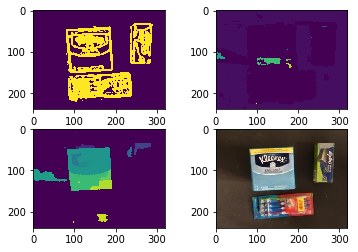

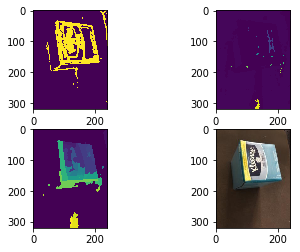

In [85]:
for fname,num in zip(imgs,nums):
    obj_num = 0
    edge_threshold = 0.03
    img = imread(os.path.join(pwd, fname))
    img_gray = rgb2gray(img)
    # denoise image
    denoised = rank.median(img[:,:,0], disk(2))
    markers = rank.gradient(denoised, disk(5)) < 10
    markers = ndi.label(markers)[0]
    gradient = rank.gradient(denoised, disk(2))
    hist_grad,_ = histogram(gradient)
    conv = ndi.binary_fill_holes(gradient > 30)
    labels = watershed(gradient, markers)
    fig, axes = plt.subplots(nrows=2, ncols=2, )
    ax = axes.ravel()
    ax[0].imshow(gradient > np.mean(gradient))
    ax[1].imshow(markers)
    ax[2].imshow(labels)
    ax[3].imshow(img)